# 1 Clearning data

In [114]:
#1.1
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/yanjiarui/desktop/INFO370/gapminder.csv.bz2', sep='\t')
df.head()

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,...,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,...,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,...,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,...,NaN,20.0,NaN,NaN,NaN,12178.107,NaN,214.80037,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,...,NaN,20.0,NaN,NaN,NaN,11840.743,NaN,207.61578,NaN,NaN


In [115]:
rows, columns = df.shape

In [116]:
#1.2 
print(rows, columns)

13055 25


In [117]:
# 1.3
df.count()

iso3                   13055
name                   12815
iso2                   12755
region                 12814
sub-region             12814
intermediate-region     5358
time                   13019
totalPopulation        12979
fertilityRate          11748
lifeExpectancy         11730
childMortality         10455
youthFemaleLiteracy      921
youthMaleLiteracy        921
adultLiteracy            937
GDP_PC                  9470
accessElectricity       5447
agriculturalLand       11145
agricultureTractors     6108
cerealProduction        9449
fertilizerHa            8126
co2                    10397
greenhouseGases         8061
co2_PC                 10394
pm2.5_35                2328
battleDeaths            1004
dtype: int64

iso3, name, iso2, region, sub-region, time, population look pretty good. The literacy for female male and adult are nealy unusable for having too less valid values

In [118]:
#1.4
df[df.time.isna()][['name', 'iso2', 'totalPopulation']]

,name,iso2,totalPopulation
180,Anguilla,AI,NaN
181,Åland Islands,AX,NaN
542,Antarctica,AQ,NaN
543,French Southern Territories,TF,NaN
964,"Bonaire, Sint Eustatius and Saba",BQ,NaN
1325,Saint Barthélemy,BL,NaN
1806,Bouvet Island,BV,NaN
1987,Cocos (Keeling) Islands,CC,NaN
2468,Cook Islands,CK,NaN
2769,Curaçao,CW,NaN


1.5 I think the observations are missing porbably because the populations are missing. These rows are incompleted.

In [119]:
# 1.6
nameMissing = len(df[(df.name.isna()) & (~df.iso2.isna())][['name', 'iso2']])
iso2Missing = len(df[(~df.name.isna()) & (df.iso2.isna())][['name', 'iso2']])
print(nameMissing)

0


In [120]:
print(iso2Missing)

60


In [121]:
#1.7
df[(~df.name.isna()) & (df.iso2.isna())][['name', 'iso2']].head()

,name,iso2
8363,Namibia,NaN
8364,Namibia,NaN
8365,Namibia,NaN
8366,Namibia,NaN
8367,Namibia,NaN


The two letter country code for Namibia is NA, according to https://en.wikipedia.org/wiki/ISO_3166-2:NA. I guess the system might wrongly recognize NA as np.nan.

In [257]:
# 1.8
countries = len(df.groupby('iso3'))
print(countries)

253


In [123]:
# 1.9
earliest = df.time.min()
print(earliest)

1960.0


In [124]:
mostRecent = df.time.max()
print(mostRecent)

2019.0


# 2 Wealth

In [125]:
#2.1
mostRecentwithGDP = df[(~df.GDP_PC.isna())].time.max()
print(mostRecentwithGDP)

2019.0


In [138]:
#2.2
average_GDP = df[df['time'] == 2019].GDP_PC.mean()
print(average_GDP)

15055.352217243239


In [139]:
#2.3
lastYear = df[~df.GDP_PC.isna()].groupby('name').time.max()
lastYear.head()

name
Afghanistan       2019.0
Albania           2019.0
Algeria           2019.0
American Samoa    2018.0
Andorra           2019.0
Name: time, dtype: float64

In [140]:
#2.4
lastYear.nsmallest()

name
Djibouti                    2010.0
Faroe Islands               2010.0
Liechtenstein               2010.0
Turks and Caicos Islands    2010.0
Eritrea                     2011.0
Name: time, dtype: float64

In [143]:
df[(df['time'] == 2019)].groupby('region').GDP_PC.mean().sort_values(ascending=False)

region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64

I think this order is not very reasonable. There are lots of missing GDP per capita data during 2019, which can potentially change or affact the order.

# 3 Description Stats

In [148]:
#3.1
df_1960 = df[df['time'] == 1960]
min1960 = df_1960.GDP_PC.min()
max1960 = df_1960.GDP_PC.max()
median1960 = df_1960.GDP_PC.median()
mean1960 = df_1960.GDP_PC.mean()


print(min1960, max1960, median1960, mean1960)

153.34393 33362.70762 1751.86291 5050.295039780219


In [149]:
#3.1
df_2019 = df[df['time'] == 2019]
min2019 = df_2019.GDP_PC.min()
max2019 = df_2019.GDP_PC.max()
median2019 = df_2019.GDP_PC.median()
mean2019 = df_2019.GDP_PC.mean()

print(min2019, max2019, median2019, mean2019)

208.07473 111043.5317 5922.52759 15055.352217243239


3.2
The world has become rich, with a prominent increment of the median, mean data shown above. However, it seems like there are still inequal gdp. For example, the min gdp increased from 153 to 208, while the max from around 33362 to 111043. The difference of the changing ratio is large. While the range of the gdp (max - min) became even larger shows it is not pretty equal.

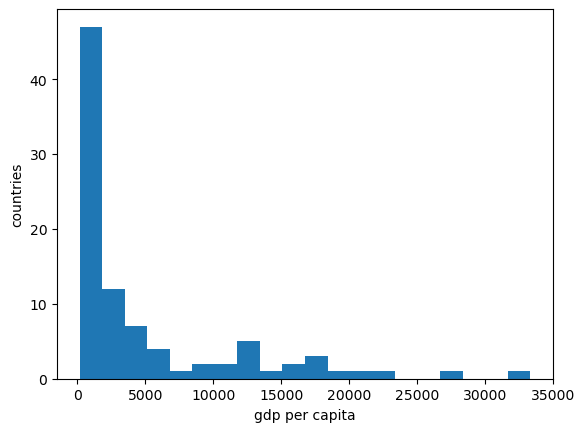

In [163]:
#3.3
import matplotlib.pyplot as plt

x1960 = df[df['time'] == 1960].GDP_PC
plt.hist(x1960, bins=20)
plt.ylabel('countries')
plt.xlabel('gdp per capita')
plt.show()

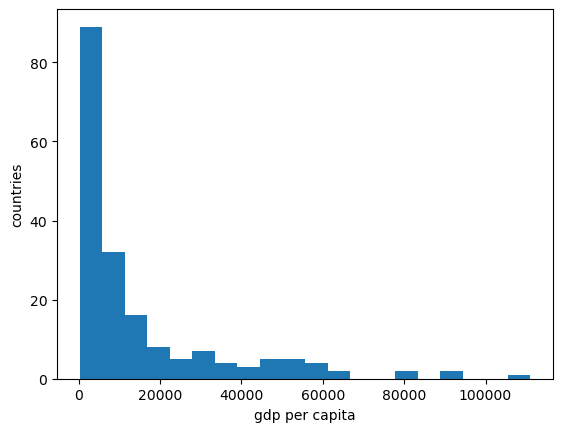

In [164]:
x2019 = df[df['time'] == 2019].GDP_PC
plt.hist(x2019, bins=20)
plt.ylabel('countries')
plt.xlabel('gdp per capita')
plt.show()

3.4
These two graphs have similar distribution, lots of countries within the range of the relative low gdp per capita. Although the max of the gdp has increased a lot, the distribution kept same, and the number of countries within the low range even increased. This means there are still lots of countries relatively poor.

In [184]:
#3.5
ratio_df1960 = df[(~df.GDP_PC.isna()) & (df.time == 1960)]
S80 = ratio_df1960[ratio_df1960.GDP_PC > np.percentile(ratio_df.GDP_PC, 80)].GDP_PC.sum()
S20 = ratio_df1960[ratio_df1960.GDP_PC < np.percentile(ratio_df.GDP_PC, 20)].GDP_PC.sum()
quintileShare = S80/S20

print(quintileShare)

1.6407327096953084


In [190]:
ratio_df2019 = df[(~df.GDP_PC.isna()) & (df.time == 2019)]
S80 = ratio_df2019[ratio_df2019.GDP_PC > np.percentile(ratio_df.GDP_PC, 80)].GDP_PC.sum()
S20 = ratio_df2019[ratio_df2019.GDP_PC < np.percentile(ratio_df.GDP_PC, 20)].GDP_PC.sum()
quintileShare = S80/S20

print(quintileShare)

57.22513517688509


The inequality measured by quintile share ratio is continuely increasing. From 1.64 to 57.22 means there is a lot increment over these 60 years. Quintile share ratio measures the value held by the top 20% people over the poor 20% people. The difference between the rich and poor increased a lot.

In [265]:
#3.6
ratio_df1960[ratio_df1960.GDP_PC > np.percentile(ratio_df.GDP_PC, 65)].GDP_PC.sum() / ratio_df1960.GDP_PC.sum()

0.6500732412589996

In [266]:
ratio_df2019[ratio_df2019.GDP_PC > np.percentile(ratio_df.GDP_PC, 74.5)].GDP_PC.sum() / ratio_df2019.GDP_PC.sum()

0.7461229092173639

The conclusion is similar to the previous one. The Pareto ratio represent x% people manage the (100 - x)% asset. During 1960, 35 percent of rich people manage the 65 percent of wealth, and this increased at 2019 while only 25 percent of the rich people manage 75 percent of people.

3.7
These data use calculation to precisely tell how the rich people increased the managment of the world wealth. The difference between the poor and rich is significantly increased from different way of measures.

# 4 Health

In [196]:
#4.1
noCM1960 = len(df[(df['time'] == 1960) & (df.childMortality.isna())])
noCM2019 = len(df[(df['time'] == 2019) & (df.childMortality.isna())])
print(noCM1960)

104


In [197]:
print(noCM2019)

24


The data did improve over time from 104 missing to 24 missing.

In [203]:
#4.2
df.childMortality.min()

1.7

In [199]:
df.childMortality.max()

420.6

In [207]:
#4.3
df[df.childMortality == df.childMortality.min()][['time', 'name', 'childMortality']]

,time,name,childMortality
10587,2018.0,San Marino,1.7
10588,2019.0,San Marino,1.7


In [206]:
df[df.childMortality == df.childMortality.max()][['time', 'name', 'childMortality']]

,time,name,childMortality
7703,1963.0,Mali,420.6


In [212]:
indexmax = df[df['time'] == 2019].groupby('region').childMortality.idxmax()
df.iloc[indexmax][['name']]

,name
8603,Nigeria
5176,Haiti
9144,Pakistan
7399,"Moldova, Republic of"
6199,Kiribati


In [213]:
indexmin = df[df['time'] == 2019].groupby('region').childMortality.idxmin()
df.iloc[indexmin][['name']]

,name
6679,Libya
1986,Canada
2890,Cyprus
10588,San Marino
663,Australia


# 5 Graphical Analysis

In [222]:
df.iloc[df[df['time'] == 2019].childMortality.idxmax()][['name']]

name    Nigeria
Name: 8603, dtype: object

In [223]:
df.iloc[df[df['time'] == 2019].childMortality.idxmin()][['name']]

name    San Marino
Name: 10588, dtype: object

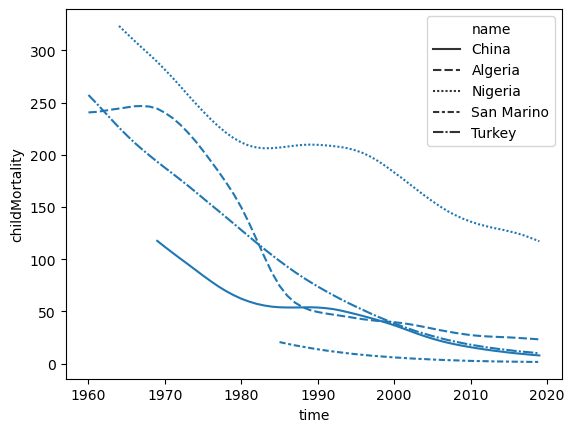

In [259]:
import seaborn as sns

sns.lineplot(x="time", y="childMortality", style="name",
                    data=df[(df.name == "Nigeria") | (df.name == "San Marino") |
                           (df.name == "Turkey") | (df.name == "China") | (df.name == "Algeria")])
plt.show()

It is pretty clear that the child mortality is decreasing over time. Expect Nigeria, with the highest child mortality among globle, it is still higher than others. For Algeria, China, San Marion, the mortality is decreasing over time. Turkey, the lowest child mortality country, is keeping a low rate. There is possibility that due to the missing data before 1985 Turkey is the lowest child mortality country.